In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import NewBasis as Nb
import Hubb as Hb
import CompareStrings as CS
import nfile as nf
m = 20 # number of nodes
dimens = m*m # dimension of status 
nmax = 1
N = 1 # number particles 
mu = 0 # chemical potential < 0 ( + in Hubbard )
V = 0 # non-magnetic impurities
t = 1 # amplitude of jump
delta = 0 # amplitude of pairing 
sum1 = -t*np.sqrt(1)


In [31]:

B = Nb.Basis(dimens) 
print(B)
H = np.zeros((dimens,dimens))

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


[[ 0. -1.  0. ...  0.  0.  0.]
 [-1.  0. -1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ... -1.  0. -1.]
 [ 0.  0.  0. ...  0. -1.  0.]]


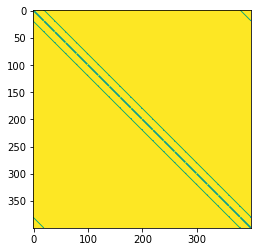

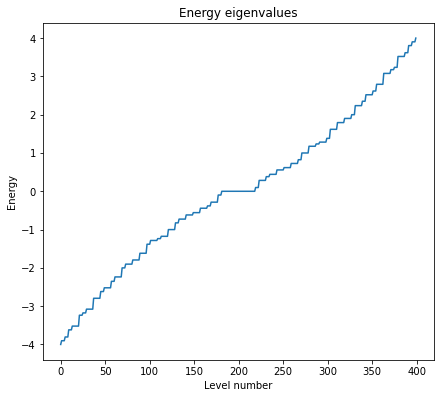

In [32]:
# поиск соседей 
d = Hb.Hubbard(m)
for p in range(m):
    for s in range(m):
        setka = np.zeros((m,m))
        setka[p][s] = 1
        str_start = nf.matrix_number(setka)
        particle = [p,s]
        y = d.neighbours(particle)
        #print(y)

        str1 = []
        str2 = []
        str3 = []
        str4 = []
        for i in range(len(y)):
            setka = np.zeros((m,m))
            setka[y[i][0]][y[i][1]] = 1
            #print(setka)
            for k in range(len(setka)):
                for j in range(len(setka)):
                    if i == 1:
                        str1.append(setka[k][j])
                    elif i == 2:
                        str2.append(setka[k][j])
                    elif i == 3:
                        str3.append(setka[k][j])
                    else:
                        str4.append(setka[k][j])

        k1 = CS.CompareStrings(str1,B)
        k2 = CS.CompareStrings(str2,B)
        k3 = CS.CompareStrings(str3,B)
        k4 = CS.CompareStrings(str4,B)
        
        i = CS.CompareStrings(str_start,B)
                    

                    
        H[i][k1] = sum1
        H[i][k2] = sum1
        H[i][k3] = sum1
        H[i][k4] = sum1

print(H)
plt.imshow(H, cmap = "viridis")

E,C = np.linalg.eig(H)

fig,ax = plt.subplots(figsize = (7,6.2))
ax.set_title("Energy eigenvalues")
ax.set_ylabel('Energy')
ax.set_xlabel('Level number')

plt.plot(sorted(E))

E1 = sorted(E)

c:\eSupport\ANACONDA\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


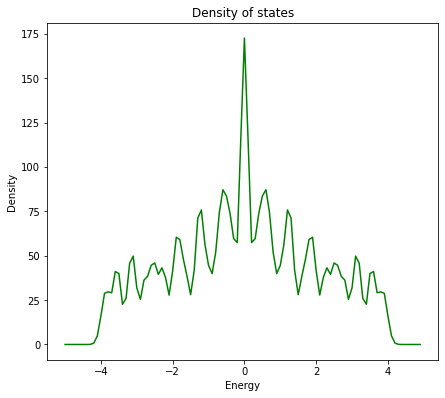

In [33]:
omega = np.arange(-5,5,1e-1)
R = []
for i in range(100):
    R.append(0)
sigma = 1e-1
data_D = []
for j in range(100):
    for i in range(len(E)):
        R[j]= R[j] + np.exp(-(omega[j]-E[i])**2/(2*sigma**2))/np.sqrt(2*3.14*sigma**2)
    data_D.append(R[j])
fig1,ax1 = plt.subplots(figsize = (7,6.2))
ax1.set_title("Density of states")
ax1.set_ylabel('Density')
ax1.set_xlabel('Energy')

plt.plot(omega,data_D,'green')